In [264]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats import norm
from scipy.stats import t 



1- After importing necessary libraries we have to understand datatypes, identify data, find out missing values and duplicates to do this first of all I have to load necessary files into dataframes of pandas.

In [265]:
#Loading all datasets
df_cab = pd.read_csv('datasets\Cab_Data.csv')
df_city = pd.read_csv('datasets\City.csv')
df_customer = pd.read_csv('datasets\Customer_ID.csv')
df_transaction = pd.read_csv('datasets\Transaction_ID.csv')

In [266]:
#Looking all datasets' shapes
shapes = [i for i in [df_cab.shape, df_city.shape,df_customer.shape, df_transaction.shape]]
datasets = ['df_cab', 'df_city','df_customer', 'df_transaction']
dict1 = {'datasets':datasets,
         'shapes':shapes}
shapes_df = pd.DataFrame(dict1)

shapes_df

,datasets,shapes
0,df_cab,"(359392, 7)"
1,df_city,"(20, 3)"
2,df_customer,"(49171, 4)"
3,df_transaction,"(440098, 3)"


In [267]:
#Control: is there any null values in datasets
cab_n = df_cab.isna().any().sum()
cust_n = df_customer.isna().any().sum()
transac_n = df_transaction.isna().any().sum()


print('Null values of cab data: {}, customer data: {}, transaction data: {}'.format(cab_n, cust_n, transac_n))


Null values of cab data: 0, customer data: 0, transaction data: 0


In [268]:
#Control: is there any duplicated value in datasets
cab_d = df_cab.duplicated().sum()
cust_d = df_customer.duplicated().sum()
transac_d = df_transaction.duplicated().sum()


print('Duplicated values of cab data: {}, customer data: {}, transaction data: {}'.format(cab_d, cust_d, transac_d))

Duplicated values of cab data: 0, customer data: 0, transaction data: 0


- It can be seen that there is no duplicated or null value in datasets by running code above.

In [269]:
#Print dtypes
df_cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

- There is 2 columns of object that can be converted to category dtype

In [270]:
#How many cities and compani existed in dataset
unique_company = set(df_cab.Company)
unique_city = set(df_cab.City)
print('Count of unique company:', len(unique_company))
print('Count of unique city:', len(unique_city))

Count of unique company: 2
Count of unique city: 19


In [271]:
df_cab.Company.astype('category', copy = False)

0           Pink Cab
1           Pink Cab
2           Pink Cab
3           Pink Cab
4           Pink Cab
             ...    
359387    Yellow Cab
359388    Yellow Cab
359389    Yellow Cab
359390    Yellow Cab
359391    Yellow Cab
Name: Company, Length: 359392, dtype: category
Categories (2, object): ['Pink Cab', 'Yellow Cab']

In [272]:
#Preprocessing df_city
df_city['Population'] = df_city['Population'].str.replace(',','').astype('int')
df_city['Users'] =df_city['Users'].str.replace(',','').astype('int')
df_city.dtypes

City          object
Population     int32
Users          int32
dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

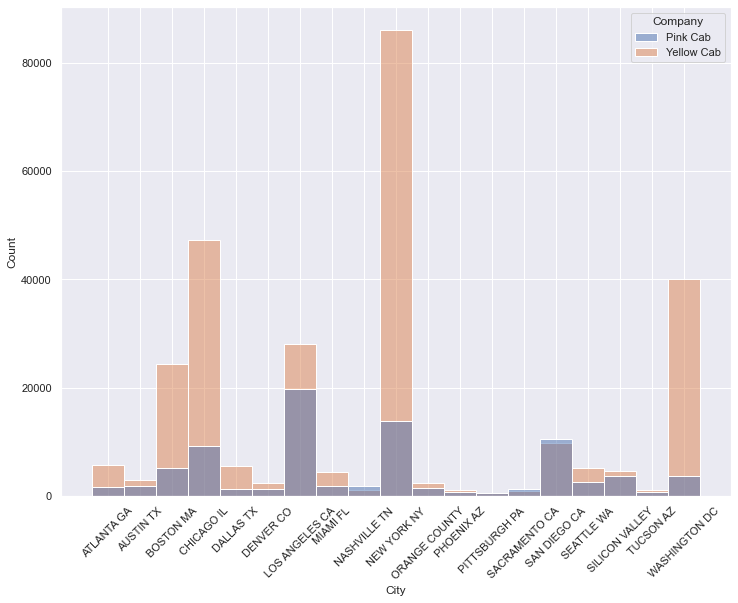

In [273]:
#Plotting a histogrom to see the visualization of city counts and companies stacked 
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(x= 'City', hue='Company',data = df_cab)
plt.xticks(rotation=45)


In [274]:
#Define function to calculate percentage ratio in value_counts df

def ratio_calc (liste, say = 3):
    """ Calculates pct ratio of first item in values counts dataframe """
    ratios = []
    for i in range(say):
        if i%2 == 0:
            ratios.append(liste[i] / (liste[i+1] + liste[i]))
        else:
            pass
    return ratios


In [275]:
#Value counts of companies groupping by cities
count_cab= df_cab.loc[:,('City','Company')].groupby('City').value_counts().to_frame()
count_cab_list = list(count_cab[0])
#Create ratio dict
ratioss = ratio_calc(count_cab[0], len(count_cab_list))
cities = df_cab.City.unique()
dictratio = {'Ratio': ratioss,
             'City': cities}


Text(0.5, 1.1, 'Yellow Cab ratio through the cities')

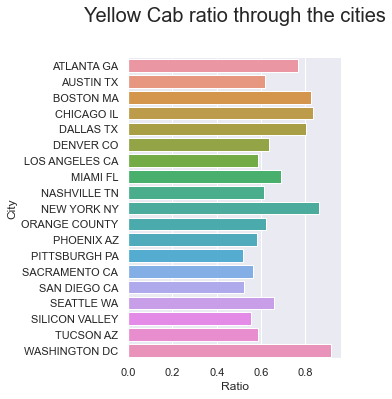

In [276]:
#Plotting a barplot
df_ratio = pd.DataFrame(dictratio)
sns.catplot(x = 'Ratio', y = 'City', data = df_ratio, kind= 'bar')
plt.title('Yellow Cab ratio through the cities', y = 1.1,fontdict={'fontsize': 20})

- In order to visualize the payment type according to age and gender
 we have to merge df_transaction and df_customer


In [277]:
#Merge Transaction and Customer data on 'Customer ID'
df_tran_cust = pd.merge(df_transaction, df_customer, on='Customer ID')

In [278]:
#How many transaction was acted by each 'Payment_Mode'
df_tran_cust.value_counts('Payment_Mode')

Payment_Mode
Card    263991
Cash    176107
dtype: int64

In [279]:
df_modetogender = df_tran_cust.loc[:,['Gender','Payment_Mode']]
df_fr =df_modetogender.groupby('Gender').value_counts().to_frame()[0]

<BarContainer object of 2 artists>

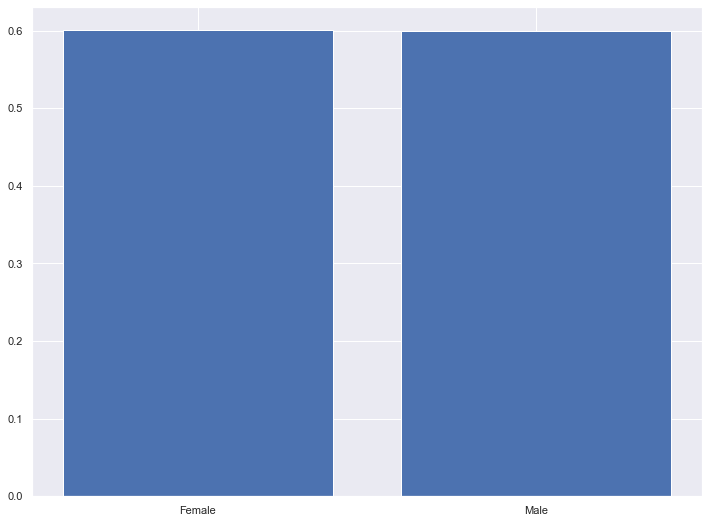

In [280]:
#Plot a barplot to visalize 'Gender' ratio
ratio = ratio_calc(df_fr, 3)
plt.bar(['Female', 'Male'], ratio)

In [281]:
#fix the date of travel column 
df_cab['Date'] = pd.TimedeltaIndex(df_cab['Date of Travel'], unit = 'd') + dt.datetime(1899,12,30)
df_cab.drop('Date of Travel', axis = 1, inplace = True)
df_cab.tail(20)
df_cab.sort_values('Date', inplace= True)

In [282]:
#Create a column named Rate of Profit''
df_cab['Rate of Profit'] = round(((df_cab['Price Charged'] - df_cab['Cost of Trip']) / df_cab['Price Charged']),2) * 100
df_cab['Revenue'] = round((df_cab['Price Charged'] - df_cab['Cost of Trip']), 2)

In [283]:
#Calculate: Ratios of the cities in dataset and compare with zero profit percentage
loss_total_ratio =(df_cab[df_cab['Rate of Profit'] < 0].value_counts('City') / df_cab.value_counts('City')).values
cities_portion_in = (df_cab.value_counts('City', sort= False)).values / df_cab.shape[0]
df_port = pd.DataFrame()
df_port['City'] = sorted(df_cab['City'].unique())
df_port['cities_portion_in'] = cities_portion_in
df_port['loss_total_ratio'] = loss_total_ratio






In [284]:
#Merge data_city to df_port_wth_pop
df_port_wth_pop = df_port.merge(df_city, on = 'City')


C:\Users\3399\AppData\Local\Temp\ipykernel_4476\3003346690.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(labels= sorted(cities),rotation=75)
C:\Users\3399\AppData\Local\Temp\ipykernel_4476\3003346690.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(labels=sorted(cities), rotation=75)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


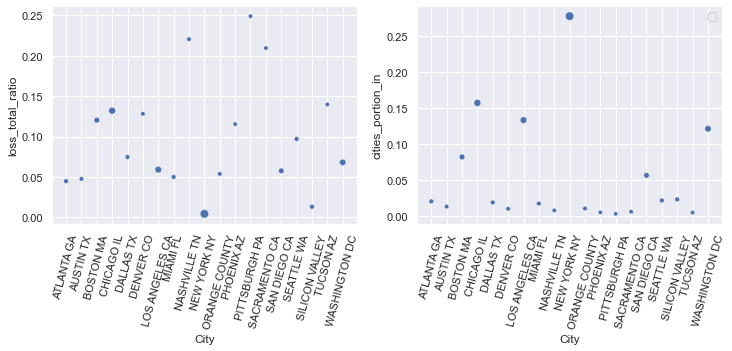

In [285]:
#Plotting dataset in df_port_wth_pop
fig, (ax1,ax2) = plt.subplots(ncols =2)
fig.set(figheight=4, figwidth=12)
a = sns.scatterplot(ax=ax1,x= 'City', y= 'loss_total_ratio', data=df_port_wth_pop, size='Users', legend=False)
a.set_xticklabels(labels= sorted(cities),rotation=75)
b =sns.scatterplot(ax= ax2,x= 'City', y= 'cities_portion_in', data=df_port_wth_pop, size='Users', legend=False)
b.set_xticklabels(labels=sorted(cities), rotation=75)
plt.legend()


In [286]:
#Load weather data
df_weather = pd.read_csv('datasets\weather_data.csv')
df_weather['Date'] = pd.to_datetime(df_weather['Unnamed: 0'])
df_weather.head()


,Unnamed: 0,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,City,Date
0,2016-01-01,7.1,5.5,8.9,0.0,0.0,308.0,15.0,NaN,1023.2,NaN,ATLANTA GA,2016-01-01
1,2016-01-02,5.7,2.8,8.9,0.0,0.0,303.0,9.9,NaN,1024.1,NaN,ATLANTA GA,2016-01-02
2,2016-01-03,6.8,2.2,12.8,0.0,0.0,299.0,7.2,NaN,1018.8,NaN,ATLANTA GA,2016-01-03
3,2016-01-04,4.6,0.5,7.8,0.0,0.0,333.0,14.5,NaN,1021.7,NaN,ATLANTA GA,2016-01-04
4,2016-01-05,2.6,-2.2,7.8,0.0,0.0,82.0,8.0,NaN,1031.7,NaN,ATLANTA GA,2016-01-05


In [287]:
#Copy df_cab
df_cabcopy = df_cab.copy()


In [288]:
#Merge df_cabcopy and df_weather
df_merged = df_cabcopy.merge(df_weather.loc[:,['City','Date', 'tavg']], on = ['City', 'Date'])
df_merged.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Rate of Profit,Revenue,tavg
0,10000640,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02,44.0,165.00,1.3
1,10000635,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02,37.0,195.75,1.3
2,10000605,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,2016-01-02,43.0,330.36,1.3
3,10000600,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,2016-01-02,37.0,194.95,1.3
4,10000592,Yellow Cab,CHICAGO IL,9.63,240.10,127.1160,2016-01-02,47.0,112.98,1.3


In [289]:
#Merge Customer and Transaction data
df_cust_tran = df_customer.merge(df_transaction, on ='Customer ID')
df_cust_tran.head()


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [290]:
#Merge cust_tran data and df_merged
df_merged2 = df_merged.merge(df_cust_tran, on= 'Transaction ID')
df_merged2.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Rate of Profit,Revenue,tavg,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000640,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02,44.0,165.00,1.3,4844,Male,32,5548,Cash
1,10000635,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02,37.0,195.75,1.3,5671,Male,24,7081,Cash
2,10000605,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,2016-01-02,43.0,330.36,1.3,3251,Male,23,13077,Cash
3,10000600,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,2016-01-02,37.0,194.95,1.3,3363,Male,31,23320,Cash
4,10000592,Yellow Cab,CHICAGO IL,9.63,240.10,127.1160,2016-01-02,47.0,112.98,1.3,4535,Male,39,19199,Card


In [291]:
#split Income column into 5 categories and save it as 'Income' column
df_merged2['Income']= pd.qcut(df_merged2['Income (USD/Month)'], 5, labels=["low", "mid-low", "average", "mid-high", "high"])

Text(-35, 4000, 'The mean Profit is about %28')

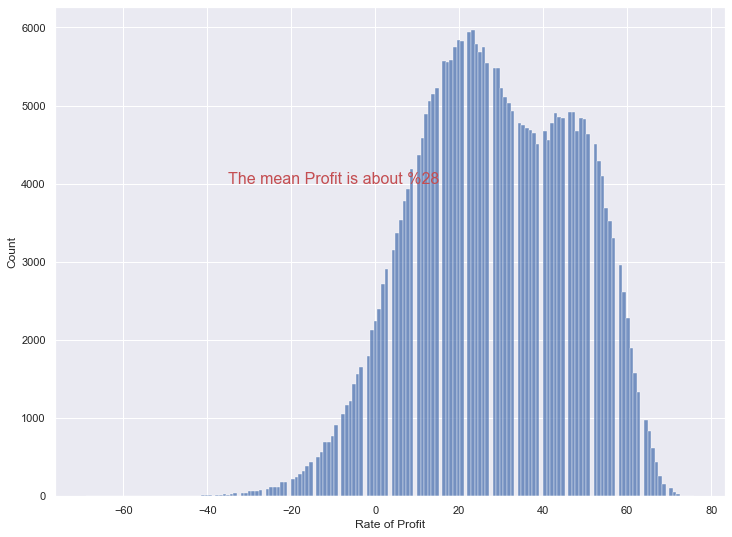

In [292]:
#Histplot of Rate of Profit
sns.histplot(x= 'Rate of Profit', data= df_merged2)
plt.text(x = -35, y = 4000, s= 'The mean Profit is about %28',fontdict={'fontsize':16, 'color':'r'})


Text(0, 0.5, 'COUNT')

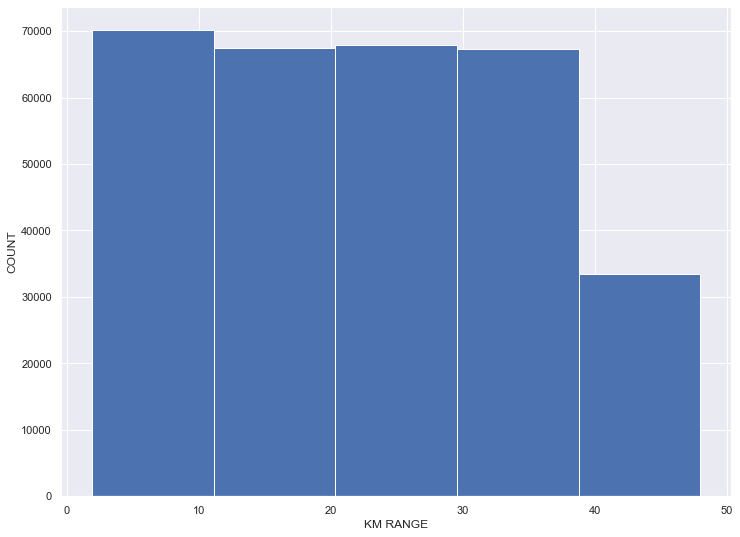

In [293]:
#Hist plot of 'KM Travelled'
df_merged2['KM Travelled'].hist(bins=5)
plt.xlabel('KM RANGE')
plt.ylabel('COUNT')

In [294]:
df_merged2['Gender'].astype('category')

0           Male
1           Male
2           Male
3           Male
4           Male
           ...  
306178      Male
306179      Male
306180      Male
306181    Female
306182      Male
Name: Gender, Length: 306183, dtype: category
Categories (2, object): ['Female', 'Male']

<AxesSubplot:xlabel='Gender', ylabel='Income (USD/Month)'>

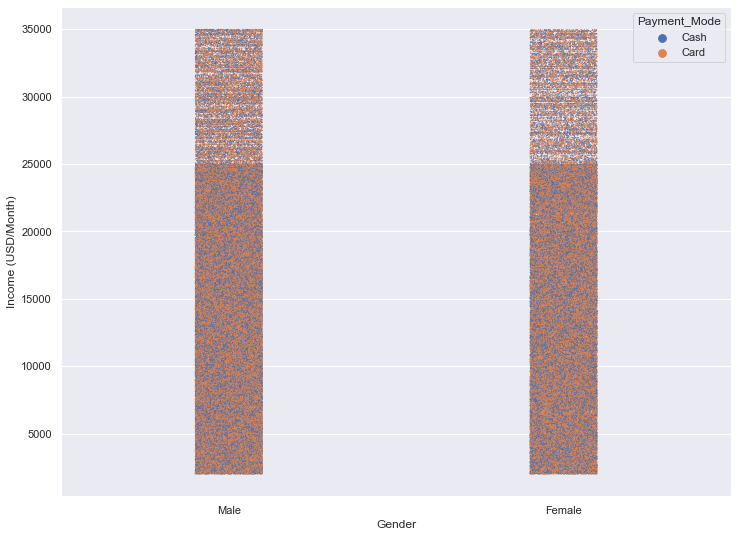

In [295]:
#Stripplot of 'Gender' to 'Income'
sns.stripplot(data=df_merged2, x= 'Gender', y= 'Income (USD/Month)', size = 1.1, hue='Payment_Mode')

Text(0.5, 1.0, 'Income (USD/Month) Age Barplot')

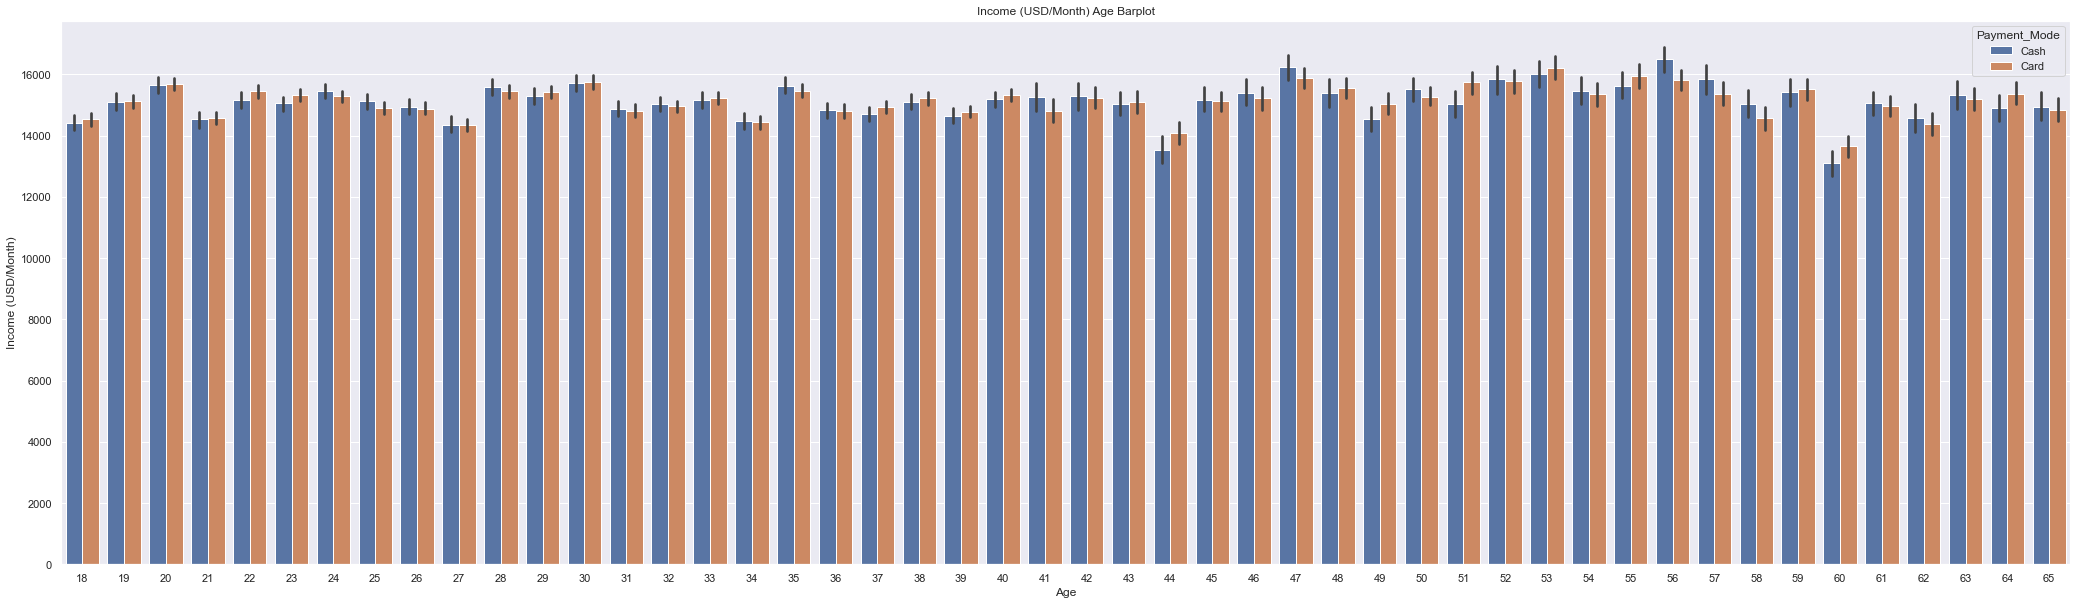

In [296]:
#Plotting age barplot
ax = sns.set(rc={'figure.figsize':(36,10)})
sns.barplot(ax= ax, data=df_merged2, x= 'Age', y= 'Income (USD/Month)',hue='Payment_Mode')
plt.title('Income (USD/Month) Age Barplot')


Text(0.5, 1.0, 'Income (USD/Month) Age Barplot')

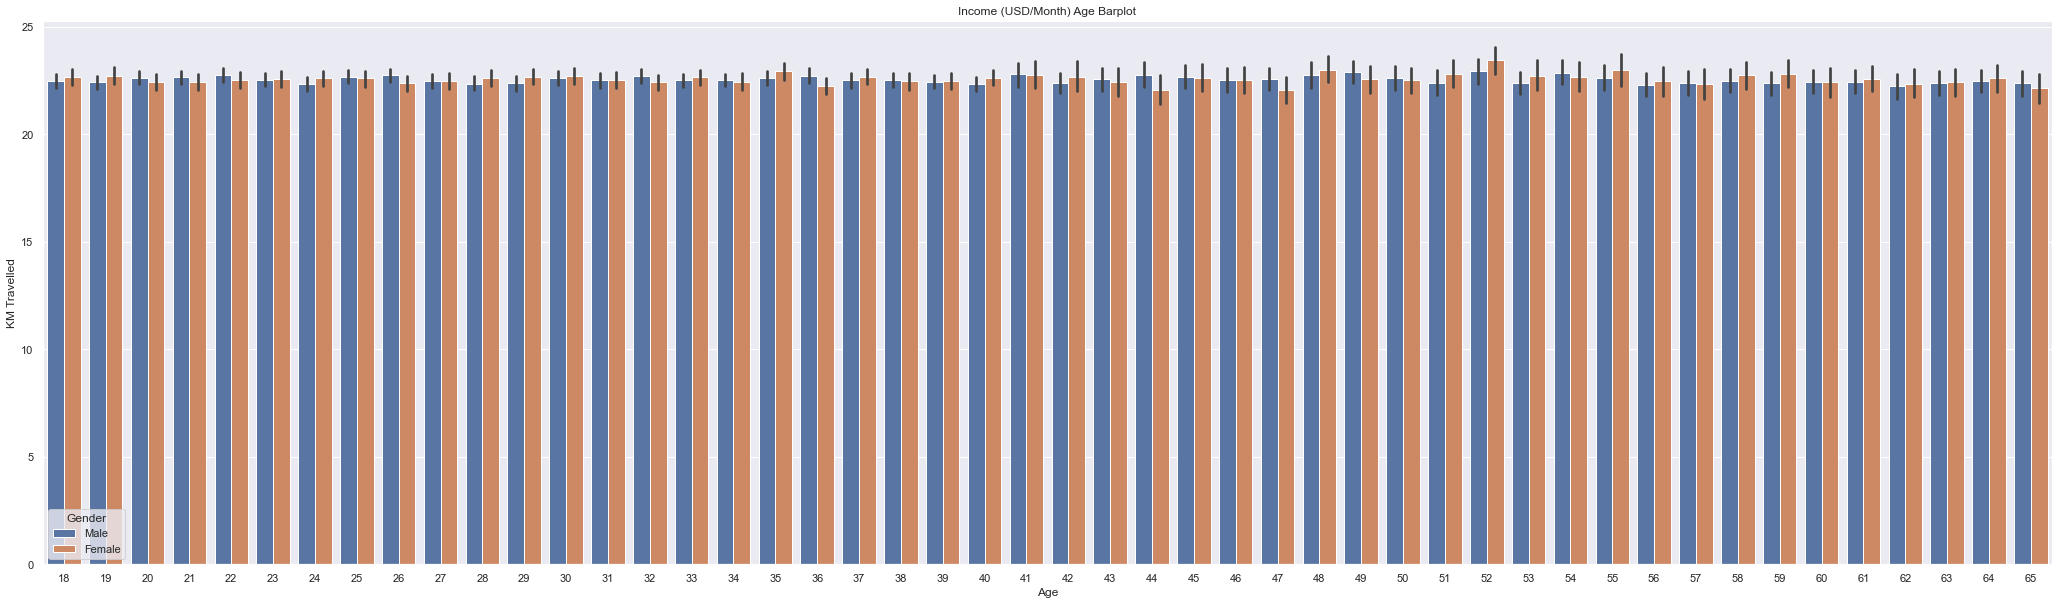

In [297]:
#Plotting age barplot
sns.barplot(ax= ax, data=df_merged2, x= 'Age', y= 'KM Travelled', hue='Gender')
plt.title('Income (USD/Month) Age Barplot')

Text(0.5, 1.0, 'Price Charged versus Payment Mode')

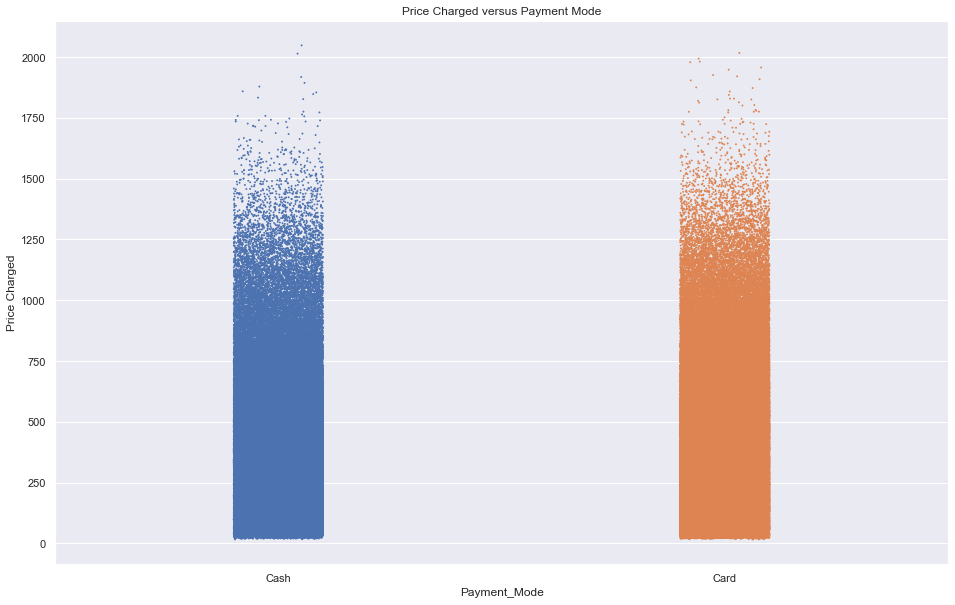

In [298]:
# Plot stripplot of 'Payment_Mode', 'Price Charged'
ax1 = sns.set(rc={'figure.figsize':(16,10)})
sns.stripplot(ax = ax1, data=df_merged2, x= 'Payment_Mode', y= 'Price Charged', size = 1.9)
plt.title('Price Charged versus Payment Mode')

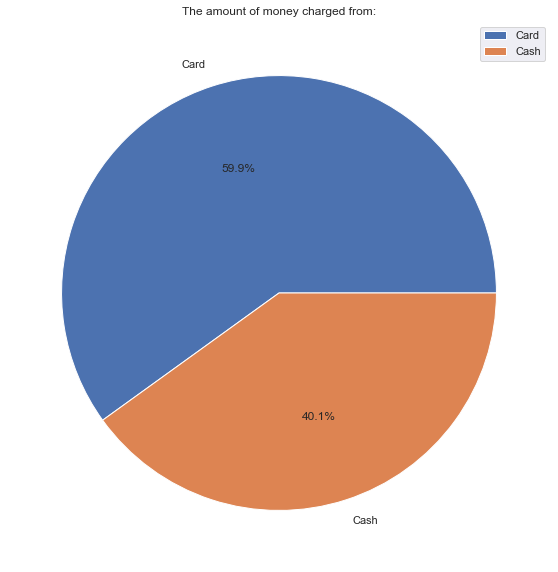

In [299]:
#Plot pieplot of quantity of mony according to 'Payment_Mode'
pmode = [df_merged2[df_merged2['Payment_Mode'] == 'Card']['Price Charged'].sum(), df_merged2[df_merged2['Payment_Mode'] == 'Cash']['Price Charged'].sum()]
plt.pie(pmode, labels=['Card', 'Cash'],autopct='%1.1f%%')
plt.title('The amount of money charged from:')
plt.legend()

In [300]:
df_merged2.value_counts('Payment_Mode', normalize=True)


Payment_Mode
Card    0.59957
Cash    0.40043
dtype: float64

<AxesSubplot:xlabel='Company', ylabel='Price Charged'>

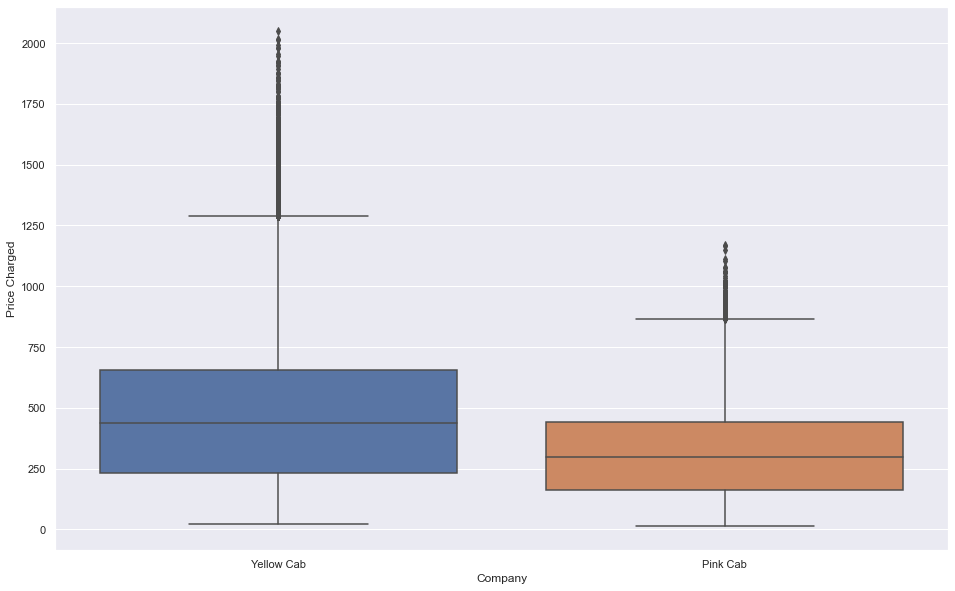

In [301]:
sns.boxplot(data=df_merged2, x= 'Company', y= 'Price Charged')

In [302]:
#Boxplot
df_merged2.value_counts('Company', normalize=True)

Company
Yellow Cab    0.747951
Pink Cab      0.252049
dtype: float64

<AxesSubplot:xlabel='Company', ylabel='Rate of Profit'>

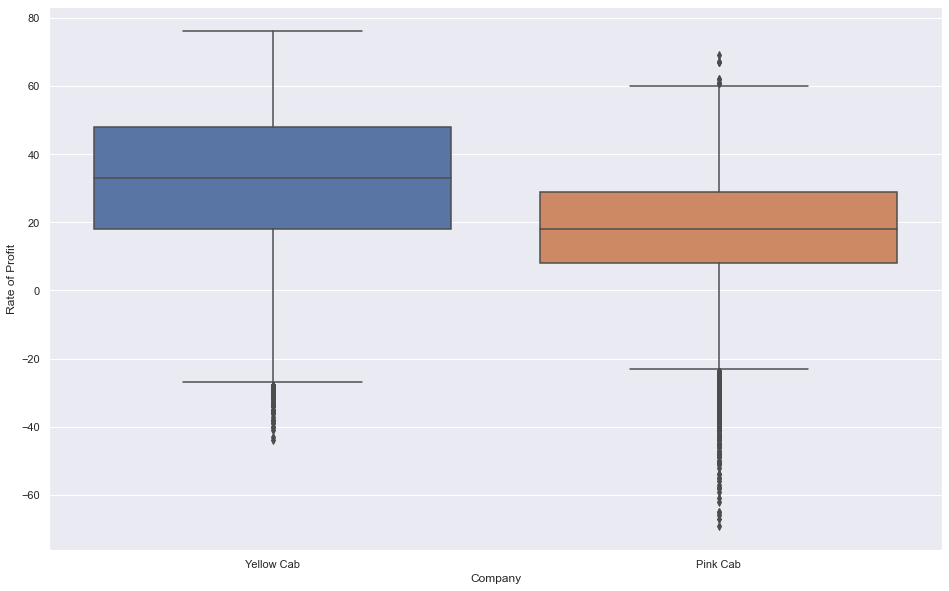

In [303]:
#Boxplot
sns.boxplot(data=df_merged2, x= 'Company', y= 'Rate of Profit')

<Figure size 1600x1200 with 0 Axes>

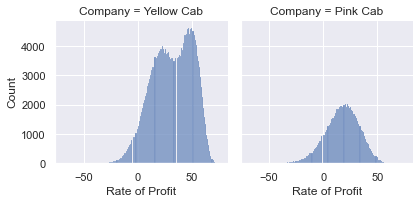

In [304]:
#Histplot of 'Rate of Profit': Density 
figure(figsize=(20, 15), dpi=80)
g = sns.FacetGrid(df_merged2, col="Company",sharey= True)
g.map(sns.histplot, "Rate of Profit")

Text(0.5, 8.95999999999998, 'Profit in Percentage')

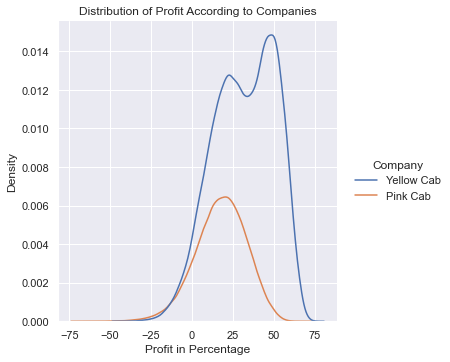

In [305]:

#Density of 'Rate of Profit' as displot
sns.displot(data=df_merged2, x="Rate of Profit", hue="Company", kind="kde")
plt.title('Distribution of Profit According to Companies')
plt.xlabel('Profit in Percentage')





<AxesSubplot:xlabel='Company', ylabel='count'>

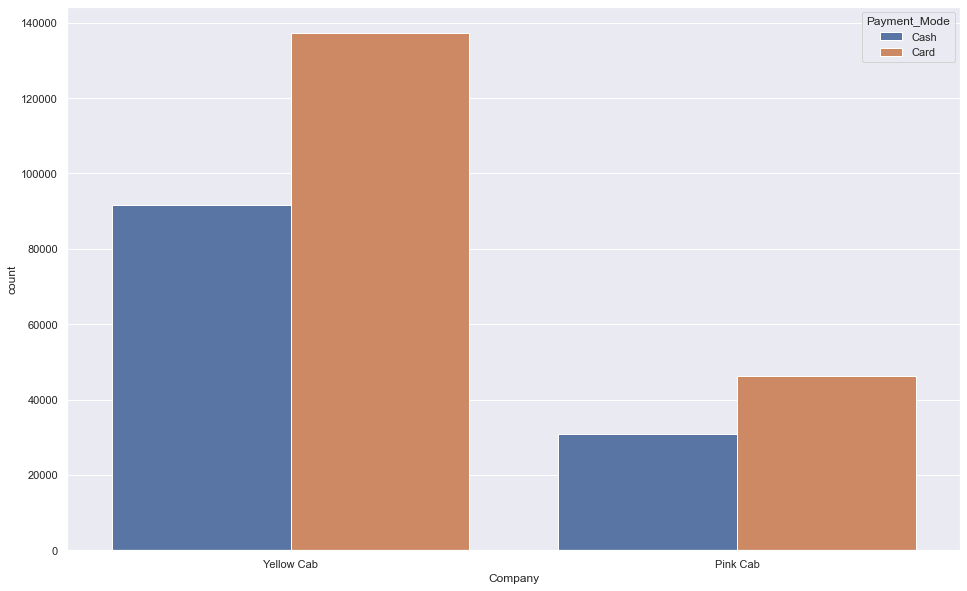

In [306]:

sns.countplot(x= 'Company', data= df_merged2, hue='Payment_Mode')

<AxesSubplot:xlabel='Company', ylabel='count'>

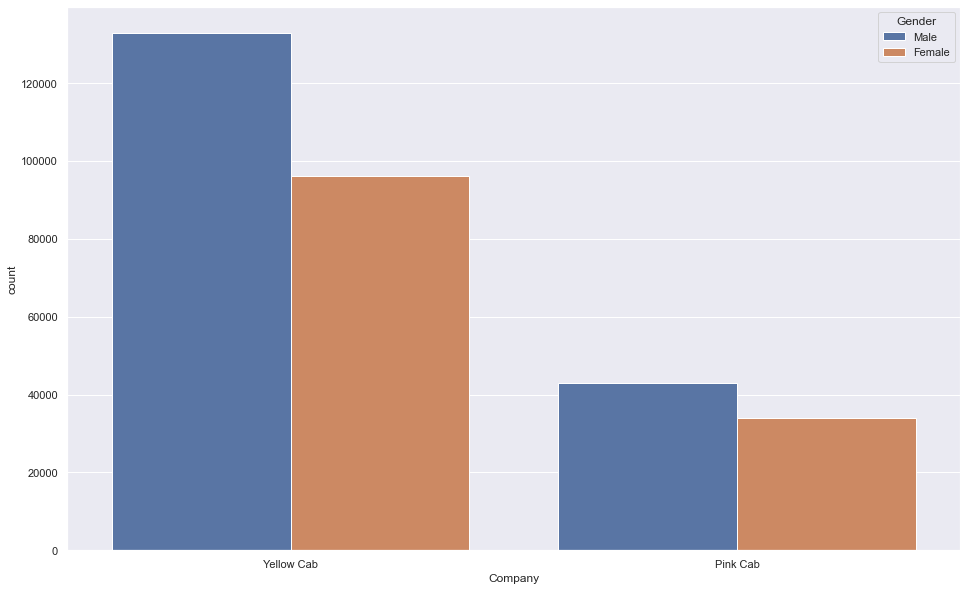

In [307]:
sns.countplot(x= 'Company', data= df_merged2, hue='Gender')

Text(0.5, 8.95999999999998, 'Income')

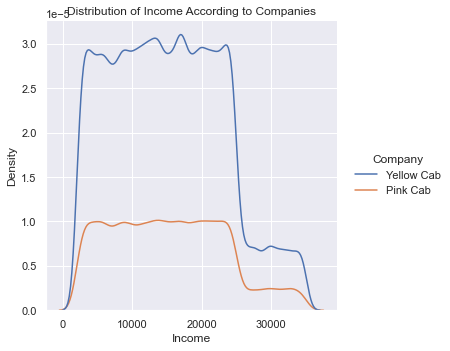

In [308]:
sns.displot(data=df_merged2, x='Income (USD/Month)', hue="Company", kind="kde")
plt.title('Distribution of Income According to Companies')
plt.xlabel('Income')

<AxesSubplot:xlabel='tavg', ylabel='KM Travelled'>

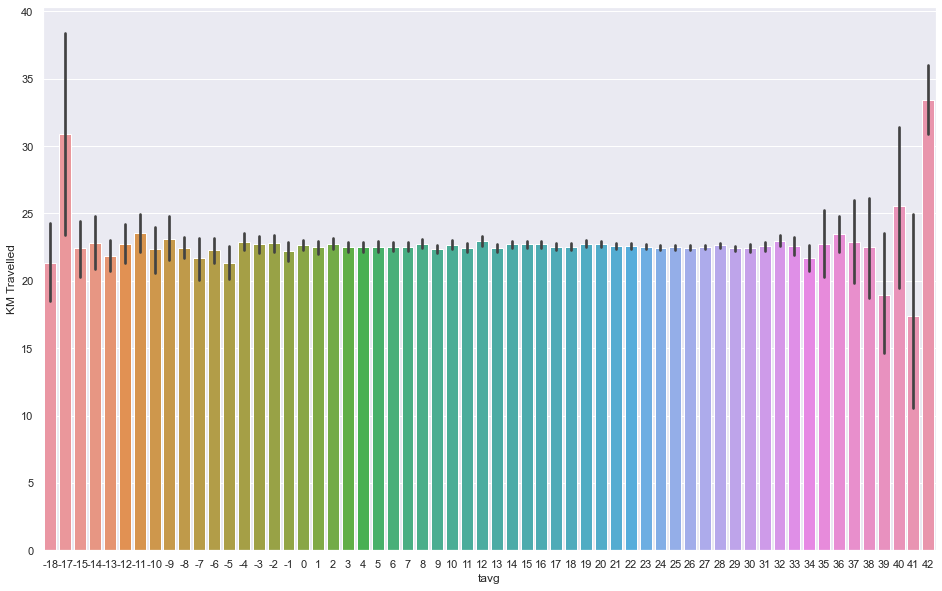

In [309]:
df_merged3 = df_merged2.copy()
df_merged3.dropna(inplace= True)
df_merged3['tavg'] = df_merged3['tavg'].astype('int')
sns.barplot(data= df_merged3, x='tavg', y= 'KM Travelled')

<AxesSubplot:xlabel='tavg', ylabel='Count'>

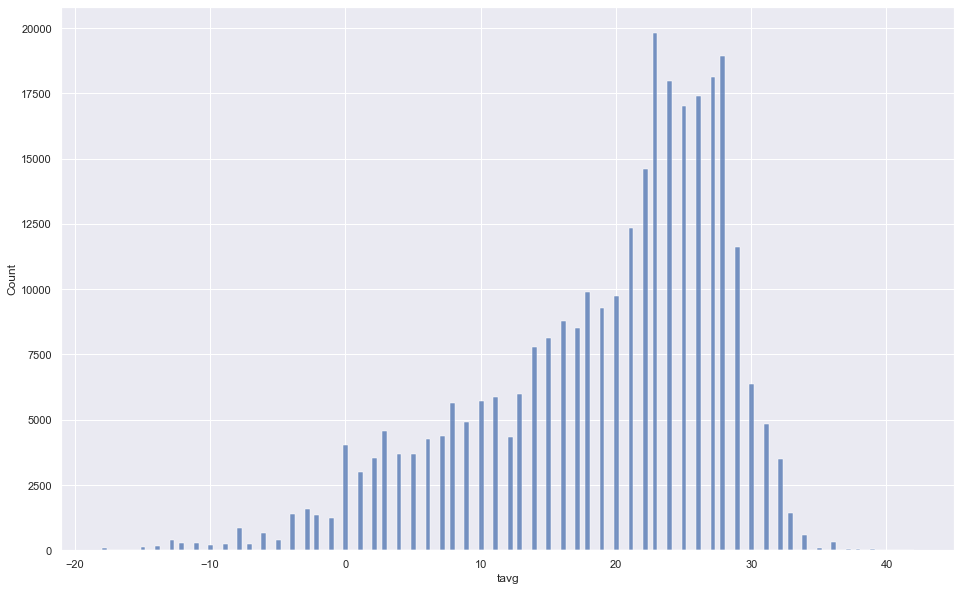

In [310]:
sns.histplot(data= df_merged3, x= 'tavg')

<AxesSubplot:xlabel='tavg', ylabel='Rate of Profit'>

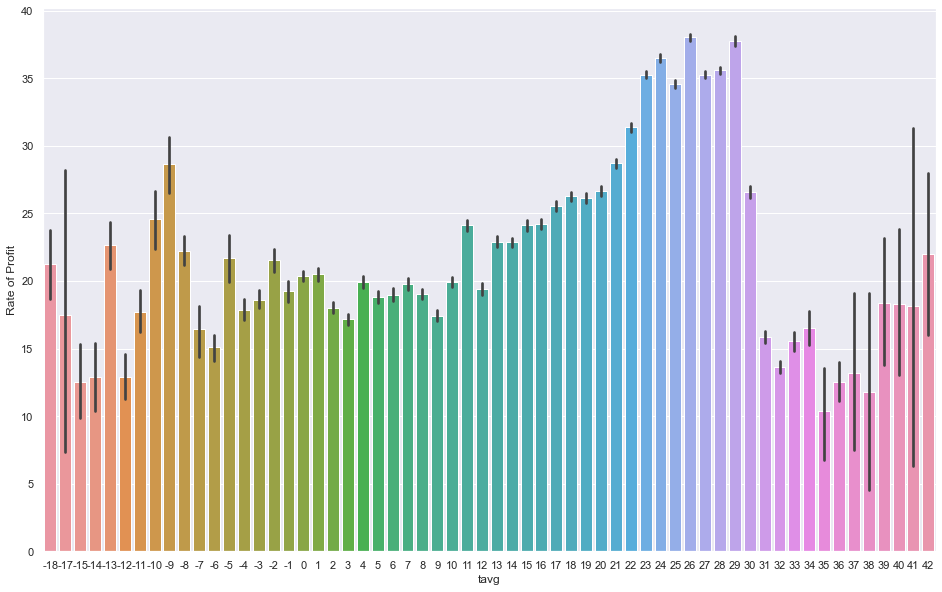

In [311]:
sns.barplot(data= df_merged3, x='tavg', y= 'Rate of Profit')

<AxesSubplot:xlabel='tavg', ylabel='Count'>

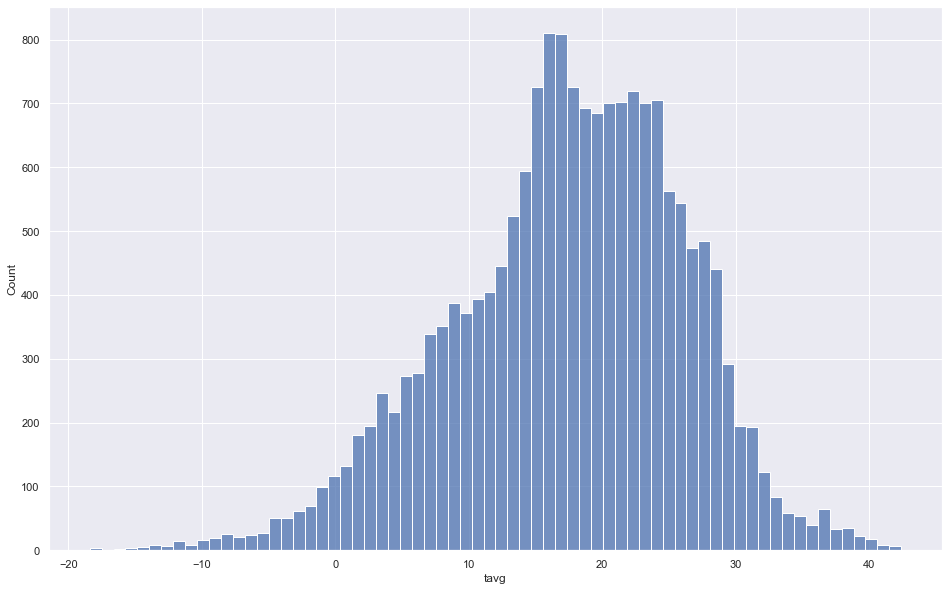

In [312]:
sns.histplot(data= df_weather, x= 'tavg')

In [317]:
#Company user profile according to Age
def accor_age(i, func= 'mean'):
    opink, oyellow = df_merged2[df_merged2['Age'] > 45].groupby('Company').agg(func)[i]
    mpink, myellow = df_merged2[(df_merged2['Age'] > 25)&(df_merged2['Age'] < 45)].groupby('Company').agg(func)[i]
    ypink, yyellow = df_merged2[df_merged2['Age'] > 0].groupby('Company').agg(func)[i]
    pnk = [opink, mpink, ypink]
    ylw = [oyellow, myellow, yyellow]
    dictpy = {'old':[opink,oyellow],
            'mid_age':[mpink, myellow],
            'young':[ypink,yyellow]}
    return pd.DataFrame(dictpy, index= ['Pink', 'Yellow'])

def accor_pymnt(i = 'Rate of Profit', func= 'mean'):
    cspink, csyellow = df_merged2[df_merged2['Payment_Mode'] == 'Cash'].groupby('Company').agg(func)[i]
    crpink, cryellow = df_merged2[df_merged2['Payment_Mode'] == 'Card'].groupby('Company').agg(func)[i]
   
    pnk = [cspink, crpink]
    ylw = [csyellow, cryellow]
    dictpy = {'Cash':[cspink,csyellow],
            'Card':[crpink, cryellow],}

    return pd.DataFrame(dictpy, index= ['Pink', 'Yellow'])



<AxesSubplot:>

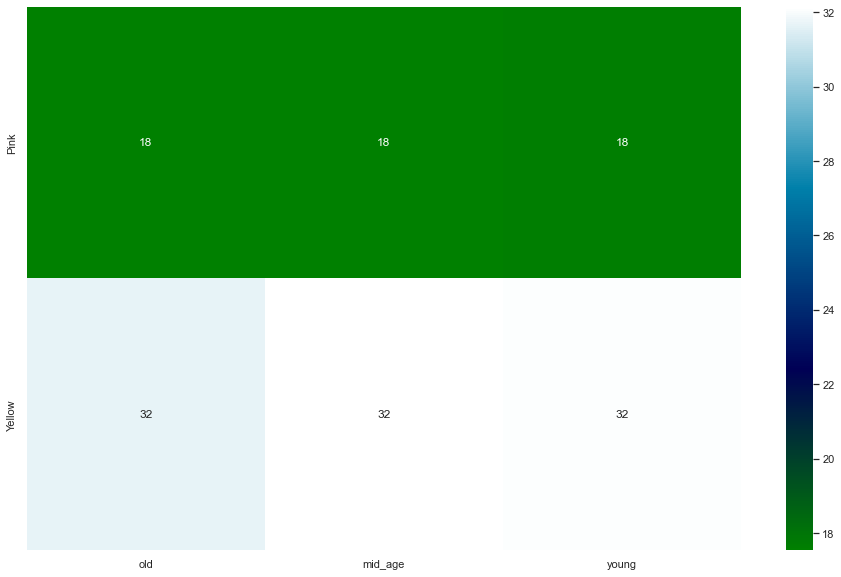

In [318]:
df_ag = accor_age('Rate of Profit')
sns.heatmap(df_ag,annot=True,cmap='ocean')


<AxesSubplot:>

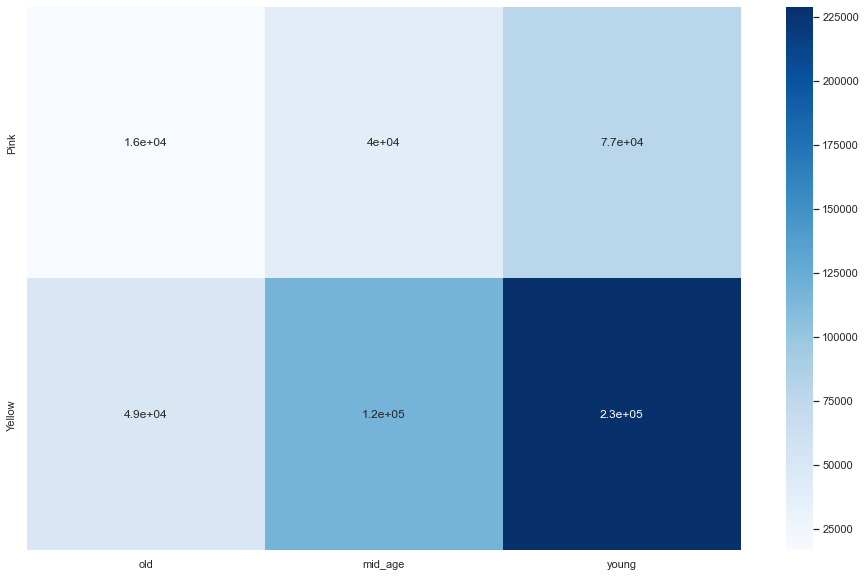

In [319]:
df_count = accor_age('Payment_Mode', func='count')
sns.heatmap(df_count,cmap= 'Blues',annot=True)


<AxesSubplot:>

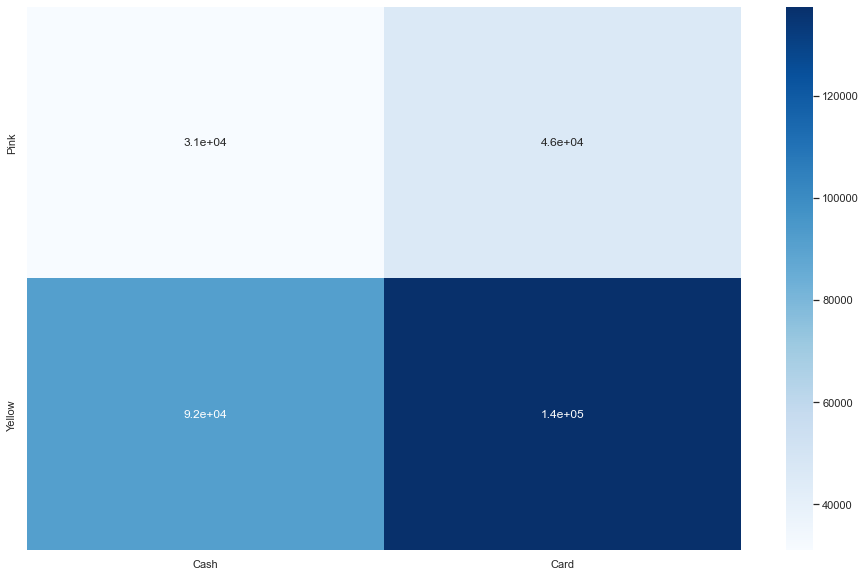

In [320]:
pymnvt = accor_pymnt(func='count')
sns.heatmap(pymnvt, cmap='Blues', annot= True)



Text(0.5, 0, 'Month')

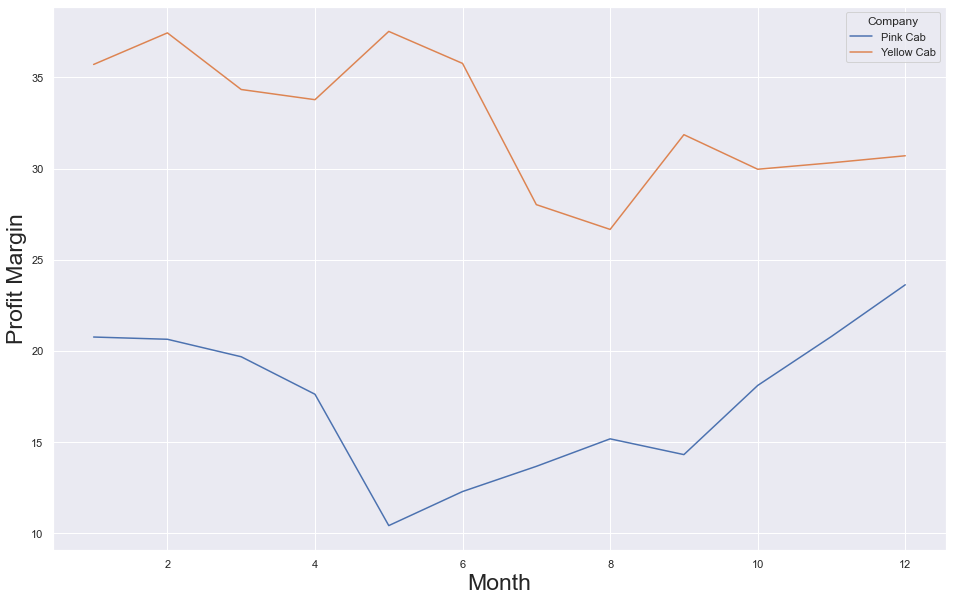

In [321]:
df_merged2['month'] = pd.DatetimeIndex(df_merged2['Date']).month
df_month_heat = df_merged2.groupby(['Company','month']).mean()[['Rate of Profit', 'KM Travelled', 'Cost of Trip']]
df_month_heat
sns.lineplot(x= 'month', y= 'Rate of Profit', data= df_month_heat, hue = 'Company')
plt.ylabel('Profit Margin', fontdict= {'fontsize': 23})
plt.xlabel('Month', fontdict={'fontsize': 23})

In [322]:
df_merged2[df_merged2['month'] == 5].groupby(['Company','Payment_Mode']).mean()

Transaction ID  KM Travelled  Price Charged  \
Company    Payment_Mode                                                
Pink Cab   Card            1.018235e+07     22.421023     282.671924   
           Cash            1.017983e+07     22.350203     279.334386   
Yellow Cab Card            1.018191e+07     22.384591     518.730926   
           Cash            1.018010e+07     22.555556     522.085312   

                         Cost of Trip  Rate of Profit     Revenue       tavg  \
Company    Payment_Mode                                                        
Pink Cab   Card            246.545708       10.616753   36.126294  21.676694   
           Cash            245.383103       10.122807   33.951250  21.847964   
Yellow Cab Card            295.487662       37.422724  223.243239  22.238885   
           Cash            297.441790       37.665064  224.643559  22.053579   

                          Customer ID        Age  Income (USD/Month)  month  
Company    Payment_Mode                                                      
Pink Cab   Card          16794.666420  35.496294        15200.731282    5.0  
           Cash          16698.033443  35.363487        15474.796601    5.0  
Yellow Cab Card          14212.457609  35.285884        15028.366886    5.0  
           Cash          14073.643269  35.352083        14989.144551    5.0

In [323]:
df_merged2[df_merged2['month'] == 12].groupby(['Company','Payment_Mode']).mean()

Transaction ID  KM Travelled  Price Charged  \
Company    Payment_Mode                                                
Pink Cab   Card            1.028032e+07     22.550602     337.560963   
           Cash            1.027467e+07     22.684226     341.078729   
Yellow Cab Card            1.028003e+07     22.574149     458.844456   
           Cash            1.028081e+07     22.614394     458.676169   

                         Cost of Trip  Rate of Profit     Revenue       tavg  \
Company    Payment_Mode                                                        
Pink Cab   Card            248.292355       23.547827   89.268588  10.883664   
           Cash            249.908540       23.738203   91.170154  10.881112   
Yellow Cab Card            298.140754       30.709889  160.703703  13.618140   
           Cash            298.448353       30.685717  160.227862  13.698024   

                          Customer ID        Age  Income (USD/Month)  month  
Company    Payment_Mode                                                      
Pink Cab   Card          15399.130670  35.131148        14948.675633   12.0  
           Cash          15666.654494  35.364714        15134.794878   12.0  
Yellow Cab Card          12809.306712  35.321163        15037.905245   12.0  
           Cash          12807.056557  35.243502        15115.011853   12.0

# Hypotesis Testing
<br>
Intuitive Testing
<br>

1-) Do Companies make more money from Patron customers?


In [324]:
#First of all create new column 'type' that turns customers to categories
#Select index of particular count ranges
df_custtype = df_merged2.value_counts('Customer ID').rename_axis('Customer ID').reset_index(name='counts')
df_custtype['type'] = 'One-time'
dfb = df_custtype[df_custtype['counts'] >= 30].index.values.astype(int)
dfb
dfb2 = df_custtype[(df_custtype['counts'] >= 10)&(df_custtype['counts'] < 30)].index.values.astype(int)
dfb2
dfb3 = df_custtype[(df_custtype['counts'] > 0)&(df_custtype['counts'] < 10)].index.values.astype(int)
dfb2[-1]



10879

In [325]:
#Name this ranges as Patron, Regular and One-Time
df_custtype.loc[:len(dfb),'type'] = 'Patron' 
df_custtype.loc[len(dfb):dfb2[-1],'type'] = 'Regular' 
df_custtype

,Customer ID,counts,type
0,494,54,Patron
1,2939,53,Patron
2,2766,51,Patron
3,1070,51,Patron
4,126,50,Patron
...,...,...,...
38593,30582,1,One-time
38594,30578,1,One-time
38595,17355,1,One-time
38596,30574,1,One-time


In [326]:
#Merge it with main dataset
df_mergedc = df_merged2.merge(df_custtype[['Customer ID','type']], on='Customer ID')
df_mergedc.groupby(['Company','type']).mean()

Transaction ID  KM Travelled  Price Charged  \
Company    type                                                    
Pink Cab   One-time    1.022206e+07     22.493158     304.732230   
           Patron      1.023303e+07     22.581595     354.937821   
           Regular     1.022246e+07     22.627036     303.501721   
Yellow Cab One-time    1.022069e+07     22.479419     418.380256   
           Patron      1.022417e+07     22.502485     601.804250   
           Regular     1.021714e+07     22.627075     414.257640   

                     Cost of Trip  Rate of Profit     Revenue       tavg  \
Company    type                                                            
Pink Cab   One-time    247.479911       16.058747   57.252327  16.515242   
           Patron      248.386861       27.643933  106.550971  25.066771   
           Regular     248.867319       15.710609   54.634396  18.477611   
Yellow Cab One-time    296.591409       26.104240  121.788835  17.228937   
           Patron      297.049192       49.218302  304.755066  24.840050   
           Regular     298.724104       23.724007  115.533533  17.382446   

                      Customer ID        Age  Income (USD/Month)     month  
Company    type                                                             
Pink Cab   One-time  27708.165252  35.167788        15016.838657  7.643926  
           Patron     1586.618152  35.024998        15116.299016  8.563714  
           Regular   11756.722084  35.529317        15155.053299  7.697284  
Yellow Cab One-time  31897.686320  35.210200        14967.943060  7.449260  
           Patron     1546.654322  35.308144        15263.457696  7.731286  
           Regular   13032.881023  35.456097        15054.376464  7.249966

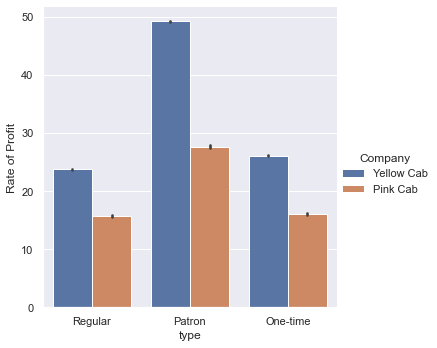

In [327]:
#Plot barplot 
sns.catplot(x= 'type', y= 'Rate of Profit', data= df_mergedc, hue = 'Company', kind = 'bar')

- We can easily understand the main part of the pie come from Patron customers. For more insight look presentation..


## Test 2
### Is Wheater affects the transaction?

 - Null Hypotesis ->  The average temperature of days with transactions is same as all days average temperature
<br>Assuming that weather does not affect the Transaction count.
 - Alternative Hypotesis -> The average temperature of days with transactions is bigger than all days average temperature
<br>Assuming that if weather is nicer Transaction count goes up.

In [328]:
#Bootstraping 
bootstrad= []
for i in range(5000):
    bootstrad.append(np.mean(df_merged3.sample(frac=1, replace=True)['tavg']))

(array([  2.,   2.,   0.,   1.,   3.,   5.,   5.,   5.,   5.,   3.,  10.,
         10.,   9.,  17.,  14.,  18.,  23.,  22.,  19.,  18.,  25.,  32.,
         43.,  29.,  46.,  48.,  41.,  58.,  61.,  61.,  81.,  80.,  73.,
        101.,  90.,  99., 117., 104., 124., 138., 125., 125., 133., 124.,
        162., 139., 132., 143., 138., 165., 125., 132., 127., 130., 103.,
        109., 101.,  93., 112., 101.,  91.,  69.,  73.,  69.,  57.,  55.,
         43.,  38.,  35.,  38.,  40.,  33.,  26.,  31.,  27.,  18.,  16.,
          8.,  11.,  13.,   6.,   7.,   8.,   3.,   2.,   5.,   2.,   2.,
          2.,   1.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   2.,   0.,
          2.]),
 array([18.96947704, 18.97062298, 18.97176893, 18.97291487, 18.97406081,
        18.97520676, 18.9763527 , 18.97749864, 18.97864459, 18.97979053,
        18.98093647, 18.98208242, 18.98322836, 18.9843743 , 18.98552025,
        18.98666619, 18.98781213, 18.98895808, 18.99010402, 18.99124996,
        18.99239591, 18.99

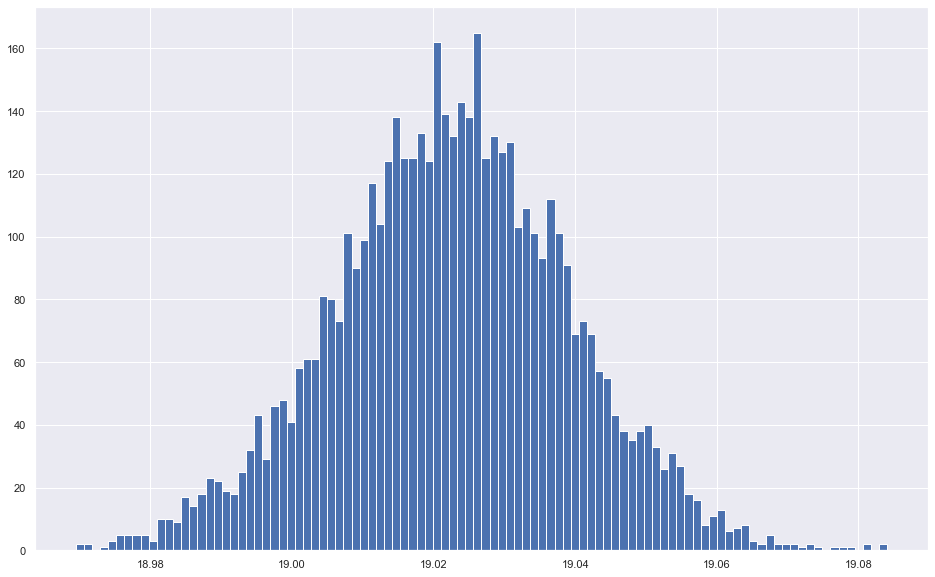

In [329]:
#Plot histplot to assess the shape of distribution
plt.hist(bootstrad, bins= 100)

In [330]:
#After see that the shape is the normal distribution calculate z-score
mean_hyp = np.mean(df_weather['tavg'])
mean_real = np.mean(df_merged3['tavg'])
std_error = np.std(bootstrad)
z_score = (mean_real - mean_hyp)/ std_error

In [331]:
#Using Normal CDF finding p-value
a = 0.05
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
if p_value < a:
    print('Alternative Hypotesis is valid')
else:
    print('Null hypotesis is True')

Alternative Hypotesis is valid


The average temperature of days with transactions is bigger than all days average temperature

## Test 3
### Is average Revenue for two company equal?
 - Null Hypotesis ->  Yellow and Pink cab companies' average revenue rate is equal.
<br> Yellow cab revenue = Pink cab revenue
 - Alternative Hypotesis -> Yellow cab revenue rate is more than Pink cab
<br> Yellow cab revenue > Pink cab revenue



In [332]:
#To find t-statistics calculate mean and std
m = df_merged2.groupby('Company')['Rate of Profit'].mean()
s = df_merged2.groupby('Company')['Rate of Profit'].std()
n = df_merged2.groupby('Company')['Rate of Profit'].count()

In [333]:
#Calculate t-stat
numerator = m[1] - m[0]
denominator = np.sqrt(s[1] ** 2 / n[1] + s[0] ** 2 / n[0])
t_stat = numerator / denominator
degrees_of = n[0] + n[1] - 2

In [334]:
#Use right tailed test
p_value_t = 1 -t.cdf(t_stat, df= degrees_of)
a = 0.05
if p_value_t < a:
    print('Alternative Hypotesis is valid')
else:
    print('Null hypotesis is True')

Alternative Hypotesis is valid


In [335]:
df_mergedc[df_mergedc['Company'] == 'Pink Cab'].groupby(['month','type']).mean()

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
month type                                                                  
1     One-time    1.020210e+07     22.707364     316.101810    249.968845   
      Patron      1.021352e+07     22.310181     359.301372    244.154706   
      Regular     1.019940e+07     22.348442     322.052719    245.767423   
2     One-time    1.015513e+07     22.595287     309.681122    248.533972   
      Patron      1.015717e+07     23.297587     360.045874    255.550161   
      Regular     1.015547e+07     22.382680     327.869628    245.996915   
3     One-time    1.016876e+07     23.311782     326.609415    256.792252   
      Patron      1.017045e+07     23.023410     334.693868    252.652834   
      Regular     1.016858e+07     22.786727     323.891016    250.736151   
4     One-time    1.017102e+07     22.258319     292.901715    244.916120   
      Patron      1.017538e+07     22.580923     325.847908    247.905228   
      Regular     1.017417e+07     22.962695     324.349666    252.860259   
5     One-time    1.018151e+07     22.266221     283.142033    245.087272   
      Patron      1.017978e+07     22.382792     293.003508    244.731045   
      Regular     1.018148e+07     22.487218     277.915334    247.044815   
6     One-time    1.019617e+07     22.770979     293.446844    250.836712   
      Patron      1.019637e+07     22.697638     289.257948    250.571610   
      Regular     1.019776e+07     22.738653     292.234466    250.104112   
7     One-time    1.020082e+07     22.314864     293.308505    245.328706   
      Patron      1.020008e+07     23.062360     320.227081    254.216112   
      Regular     1.019731e+07     22.614958     289.060138    248.521078   
8     One-time    1.021940e+07     22.382319     300.758377    246.177271   
      Patron      1.022328e+07     23.001450     320.631442    252.982538   
      Regular     1.021807e+07     22.439574     290.224696    246.818450   
9     One-time    1.023047e+07     22.357371     289.568907    245.708657   
      Patron      1.023049e+07     22.462689     321.209838    246.436980   
      Regular     1.023212e+07     22.768944     291.017103    250.504153   
10    One-time    1.024200e+07     22.465787     305.793637    247.275525   
      Patron      1.024062e+07     22.420619     376.899841    246.528633   
      Regular     1.024215e+07     22.494514     292.974889    247.267420   
11    One-time    1.026611e+07     22.312973     311.997780    245.409550   
      Patron      1.026805e+07     22.137819     369.874436    243.872465   
      Regular     1.026494e+07     22.850144     313.693441    251.282046   
12    One-time    1.027865e+07     22.586574     326.774976    248.542072   
      Patron      1.027428e+07     22.726350     423.146841    250.827091   
      Regular     1.027905e+07     22.570881     315.954264    248.514547   

                Rate of Profit     Revenue       tavg   Customer ID  \
month type                                                            
1     One-time       17.130435   66.132989   4.929769  28062.666848   
      Patron         30.528881  115.146733  18.461913   1593.752708   
      Regular        21.321762   76.285291   5.443035  12069.473075   
2     One-time       15.515652   61.147252   9.237825  27927.788696   
      Patron         27.972028  104.495769  21.003147   1493.272727   
      Regular        22.986973   81.872705  10.211849  13467.049007   
3     One-time       18.214286   69.817136  11.063701  28202.431973   
      Patron         22.541547   82.041146  21.932951   1593.421203   
      Regular        20.253754   73.154880  13.641542  12157.693193   
4     One-time       13.206102   47.985634  15.298654  28319.339661   
      Patron         22.243077   77.942708  24.246154   1612.550769   
      Regular        20.236554   71.489305  16.785117  12135.972324   
5     One-time       10.865594   38.054773  19.609892  27422.073521   
      Patron         15.

In [336]:
df_mergedc[df_mergedc['Company'] == 'Yellow Cab'].groupby(['month','type']).sum()

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
month type                                                                  
1     One-time     34968705042      77525.22     1586105.08  1.023089e+06   
      Patron       42726087404      94886.42     2559089.62  1.253382e+06   
      Regular      74337916566     165825.47     3316924.31  2.189656e+06   
2     One-time     25175369262      56134.75     1120751.34  7.411330e+05   
      Patron       34205560785      76615.16     2366618.76  1.011718e+06   
      Regular      65332701542     143336.86     2844773.01  1.891256e+06   
3     One-time     29906068604      66078.65     1340371.61  8.714266e+05   
      Patron       40837182842      90073.14     2628463.05  1.189368e+06   
      Regular      74566080392     167085.47     3100402.57  2.206656e+06   
4     One-time     31196029842      68284.53     1333163.04  9.004593e+05   
      Patron       39273018022      86321.20     2481890.73  1.137413e+06   
      Regular      73759508388     164531.44     3109106.54  2.174968e+06   
5     One-time     33139214772      72907.48     1520298.36  9.625748e+05   
      Patron       45349268706     100626.70     3145763.11  1.326488e+06   
      Regular      79309615949     174471.42     3394680.52  2.302894e+06   
6     One-time     36269766699      80175.06     1576636.30  1.056286e+06   
      Patron       43702822485      96379.99     2903219.66  1.272987e+06   
      Regular      80220550680     177434.84     3437448.82  2.340898e+06   
7     One-time     39998572456      88013.77     1538705.86  1.160166e+06   
      Patron       51668725170     115011.35     3086666.90  1.520145e+06   
      Regular      86882427994     193705.88     3298834.00  2.558396e+06   
8     One-time     46054394220     101135.34     1749331.86  1.335487e+06   
      Patron       59098148531     130145.43     3211506.77  1.718008e+06   
      Regular      96030520971     213224.53     3581794.21  2.816351e+06   
9     One-time     51747515444     114475.98     2106349.18  1.510069e+06   
      Patron       72883942740     159925.77     4090568.69  2.110636e+06   
      Regular     109002161505     238571.29     4338490.38  3.148507e+06   
10    One-time     58094057106     127668.17     2338316.14  1.684629e+06   
      Patron       86329462927     188772.93     4569444.59  2.491793e+06   
      Regular     116563873579     257436.90     4535055.40  3.396754e+06   
11    One-time     59181845368     129496.36     2245405.99  1.708034e+06   
      Patron       91947905288     202086.72     5184362.80  2.668345e+06   
      Regular     122925136953     270952.22     4849331.65  3.576185e+06   
12    One-time     65302906738     142075.62     2463578.02  1.876216e+06   
      Patron      108927520487     237096.93     5972724.76  3.129697e+06   
      Regular     133583351399     297217.95     5300430.28  3.924651e+06   

                Rate of Profit     Revenue      tavg  Customer ID     Age  \
month type                                                                  
1     One-time        107431.0   563015.87   18332.9    109764872  121412   
      Patron          207512.0  1305707.44   79284.0      6429175  148370   
      Regular         217616.0  1127268.53   40159.4     89047817  258615   
2     One-time         76603.0   379618.20   24965.5     83121913   88076   
      Patron          190314.0  1354900.28   71923.9      5318173  119181   
      Regular         192915.0   953517.32   58829.3     86298313  228313   
3     One-time         93851.0   468945.17   34161.4     96372079  104522   
      Patron          215227.0  1439095.26   88218.8      6242893  143639   
      Regular         181596.0   893746.07   84171.1    100526756  259569   
4     One-time         91096.0   432703.61   46298.2    103011191  107380   
      Patron          202947.0  1344478.17   93924.6      6047014  136648   
      Regular         184865.0   934138.32  112483.9    101657251  258330   
5     One-t

In [337]:
df_mergedc.groupby(['City','Company']).mean()

Transaction ID  KM Travelled  Price Charged  \
City           Company                                                   
ATLANTA GA     Pink Cab      1.021965e+07     22.539824     302.131555   
               Yellow Cab    1.022087e+07     22.248247     422.413446   
AUSTIN TX      Pink Cab      1.023367e+07     21.960434     320.312702   
               Yellow Cab    1.022818e+07     22.534353     422.688028   
BOSTON MA      Pink Cab      1.022321e+07     22.740746     300.551489   
               Yellow Cab    1.021511e+07     22.543649     359.140431   
CHICAGO IL     Pink Cab      1.022344e+07     22.511070     281.613731   
               Yellow Cab    1.021570e+07     22.659493     364.021927   
DALLAS TX      Pink Cab      1.021781e+07     22.021203     260.025652   
               Yellow Cab    1.021921e+07     22.599395     493.807790   
DENVER CO      Pink Cab      1.022396e+07     22.459218     276.202453   
               Yellow Cab    1.022184e+07     22.444097     443.235413   
LOS ANGELES CA Pink Cab      1.022057e+07     22.635629     305.624252   
               Yellow Cab    1.021618e+07     22.688117     416.231136   
NEW YORK NY    Pink Cab      1.023419e+07     22.622415     357.074129   
               Yellow Cab    1.022432e+07     22.496362     604.841911   
ORANGE COUNTY  Pink Cab      1.022786e+07     22.213153     312.026874   
               Yellow Cab    1.022830e+07     22.364597     438.548623   
PHOENIX AZ     Pink Cab      1.021728e+07     21.747384     280.321458   
               Yellow Cab    1.022461e+07     22.529450     428.737417   
PITTSBURGH PA  Pink Cab      1.022534e+07     22.581613     273.879355   
               Yellow Cab    1.022349e+07     22.670523     405.313661   
SACRAMENTO CA  Pink Cab      1.022323e+07     22.604303     290.110810   
               Yellow Cab    1.022273e+07     22.949719     362.637106   
SAN DIEGO CA   Pink Cab      1.021946e+07     22.554710     307.938193   
               Yellow Cab    1.022128e+07     22.391995     392.223328   
SEATTLE WA     Pink Cab      1.021363e+07     22.694133     291.223898   
               Yellow Cab    1.021592e+07     22.583783     391.014733   
SILICON VALLEY Pink Cab      1.022495e+07     22.791838     340.377008   
               Yellow Cab    1.022378e+07     22.696391     506.499502   
TUCSON AZ      Pink Cab      1.022133e+07     22.556909     323.213554   
               Yellow Cab    1.022470e+07     22.267527     366.018224   

                           Cost of Trip  Rate of Profit     Revenue  \
City           Company                                                
ATLANTA GA     Pink Cab      247.619594       15.645857   54.511924   
               Yellow Cab    293.615723       28.513546  128.797682   
AUSTIN TX      Pink Cab      241.409597       22.078284   78.903035   
               Yellow Cab    297.277655       27.135627  125.410384   
BOSTON MA      Pink Cab      250.030529       14.803124   50.520953   
               Yellow Cab    297.656812       15.364605   61.483606   
CHICAGO IL     Pink Cab      247.565821       10.094328   34.047896   
               Yellow Cab    299.097441       15.895206   64.924484   
DALLAS TX      Pink Cab      242.105281        3.486957   17.920377   
               Yellow Cab    297.958374       37.775412  195.849425   
DENVER CO      Pink Cab      247.088437        6.835725   29.114089   
               Yellow Cab    296.382238       30.883587  146.853163   
LOS ANGELES CA Pink Cab      248.955132       16.510446   56.669102   
               Yellow Cab    299.574768       26.017467  116.656363   
NEW YORK NY    Pink Cab      248.856589       28.021694  108.217569   
               Yellow Cab    296.977659       49.658872  307.864259   
ORANGE COUNTY  Pink Cab      244.613898       18.790482   67.412895   
               Yellow Cab    294.763268       29.217092  143.785379   
PHOENIX AZ     Pink Cab      239.121928       11.331019   41.199456   
               Yell

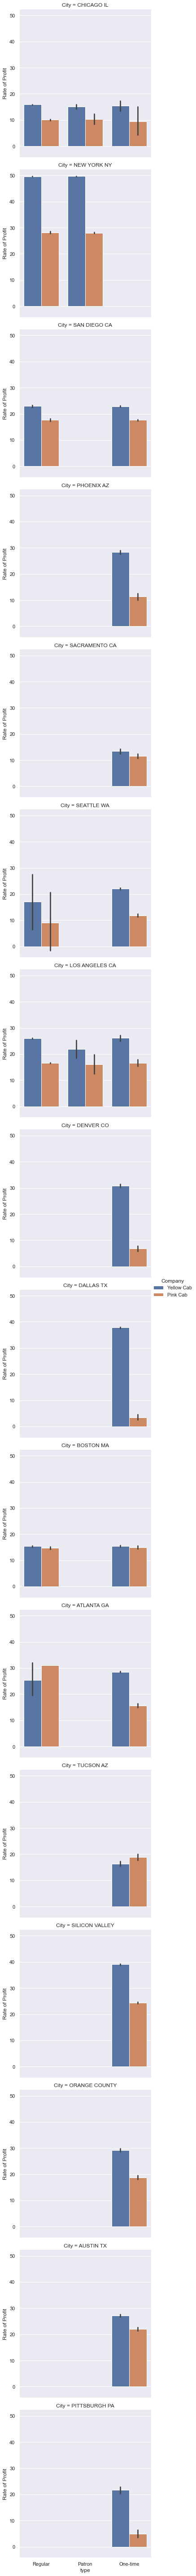

In [339]:
sns.catplot(data=df_mergedc, x= 'type', y= 'Rate of Profit', row= 'City', kind= 'bar', hue = 'Company')

### CONCLUSION
#### After looking some features like Gender, Age and Payment mode we can see that these features do not vary through different parameters
Below cells showed basicly the most important feature of this EDA: The New York City
<br>
In presentation you can see more insight about it
 

In [340]:
nwyrk_ylw = df_mergedc[(df_mergedc['City'] == 'NEW YORK NY')&(df_mergedc['Company'] == 'Yellow Cab')]['Revenue'].sum()
total_revenue = df_mergedc['Revenue'].sum()

In [341]:
nwyrk_ylw / total_revenue

0.5887625865839595

In [342]:
df_mergedc[df_mergedc['City'] == 'NEW YORK NY'].groupby(['Company','type']).mean()

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Company    type                                                                 
Pink Cab   Patron     1.023346e+07     22.578444     356.239570    248.357083   
           Regular    1.023719e+07     22.804232     360.524971    250.922006   
Yellow Cab Patron     1.022425e+07     22.502854     604.987139    297.037557   
           Regular    1.022458e+07     22.469482     604.240554    296.729636   

                    Rate of Profit     Revenue       tavg  Customer ID  \
Company    type                                                          
Pink Cab   Patron        27.977149  107.882506  25.330355  1508.195519   
           Regular       28.205882  109.603029  25.409301  1496.148897   
Yellow Cab Patron        49.665935  307.949591  25.014191  1503.204581   
           Regular       49.629630  307.510921  25.020768  1500.343385   

                          Age  Income (USD/Month)     month  
Company    type                                              
Pink Cab   Patron   34.921046        15127.303903  8.574731  
           Regular  34.805882        15091.338235  8.608824  
Yellow Cab Patron   35.278390        15266.798700  7.737736  
           Regular  34.556393        14898.958954  7.790163

XYZ Investment will get more returns if they invest in Yellow Cab company. Because their dominance is much more in market than Pink Cab. Therefore, they charge higher prices than Pink Cab even if their cost relatively close to each other.

Pink Company executers have to focus on marketplace that they can be more dominant. So as to, they have to improve the strategy sensibly and try to capture more piece from market where the they can compete with Yellow Cab.